In [29]:
import numpy as np
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
import random
from sklearn.metrics import mean_squared_error


In [30]:
#Implementing Linear Regression with Gradient Descent
class CustomLinearReg():

  def __init__(self,learning_rate,n_epochs):
    self.rate = learning_rate
    self.iter = n_epochs
    self.weights = None
    self.bias = None

  def train(self, X, Y):

    #Determine number of data points and features in dataset
    self.n, self.features = X.shape

   
    self.weights = np.zeros(self.features)
    self.bias = 0

    #Perform gradient descent
    for i in range(self.iter):
      self.weight_update(X, Y)

  def weight_update(self, X, Y):
    y_pred = np.dot(X, self.weights) + self.bias

    #Calculating the gradients
    dw = (-2 * np.dot(X.T , (Y-y_pred))) / self.n
    db = (-2  * np.sum(Y-y_pred)) / self.n

    #Updating the parameters
    self.weights = self.weights - self.rate * dw
    self.bias = self.bias - self.rate * db

  def predict(self,X):
    y_out = np.dot(X, self.weights) + self.bias
    return y_out

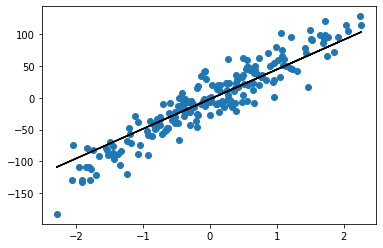

In [31]:
#Generating a random regression problem 
X, Y = datasets.make_regression(n_samples=200, n_features=1, noise=20, random_state= 7 )
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#Training and testing the model
model = CustomLinearReg(learning_rate=0.001,n_epochs=1000)
model.train(X_train, Y_train)
y_predicted = model.predict(X_test)


plt.scatter(X, Y)
plt.plot(X , model.predict(X), color = 'black')
plt.show()